# ${\color{purple}\mathbb{NAMES:}}$
1- ${\color{red}Yuval\ Kaver}$, id: 329

2- ${\color{red}Matan\ Ginzburg}$, id: 215

# ${\color{pink}{Python- Simple- Implemation:}}$

In [2]:
import numpy as np
import sympy as sy  #for integral...
import scipy            #for integral
import scipy.integrate
import matplotlib.pyplot as plt
import math

In [3]:
def phi_pie(t):
    return sy.Piecewise(
            (1, (0<=t) & (t<1) ),
            (0, True)) 

def psi_pie(t):
    return sy.Piecewise(
            (1, (0<=t) & (t<0.5) ),
            (-1, (0.5<=t) & (t<1) ),
            (0, True)) 

def phi(t):
    if 0<=t and t<1:
        return 1
    return 0

def psi(t):
    if 0<=t and t<0.5:
        return 1
    if 0.5<=t and t<1:
        return -1
    return 0


In [4]:
#2**(j/2) * phi(2**j *t-k) / psi..
def phi_j_k(t,j,k):
    return 2**(j/2) * phi((2**j)*t-k)

def psi_j_k(t,j,k):
    return 2**(j/2) * psi((2**j)*t-k)

def phi_pie_j_k(t,j,k):
    return 2**(j/2) * phi_pie((2**j)*t-k)


In [5]:
print(phi(0.2))
print(phi_j_k(0.2,2,0))
print(phi_pie_j_k(0.2,2,0))
print(type(psi_j_k(0.2,2,0)))
print(type(phi_pie_j_k(0.2,2,0)))


1
2.0
2.00000000000000
<class 'float'>
<class 'sympy.core.numbers.Float'>


In [6]:
def x(t):
    if 0<=t and t<0.5: 
        return 1
    if 0.5<=t and t<1: 
        return 2
    return 0
def sinus(t):
    return np.sin(t)

In [7]:
def c_j_k_inside_integral(t,j,k):   #for the sym.piecewise..
    return x(t)*phi_j_k(t,j,k)

we will use what we had before:
$$
c_{j,k} = 2^{j/2} \int_{\frac{k}{2^j}}^{\frac{k+1}{2^j}} x(t)dt
$$
$$
d_{j,k} =2^{j/2} \int_{\frac{k}{2^j}}^{\frac{k+1/2}{2^j}} x(t)dt-
2^{j/2} \int_{\frac{k+1/2}{2^j}}^{\frac{k+1}{2^j}} x(t)dt
$$

In [8]:
#Integrate func from a to b (possibly infinite interval) using a technique from the Fortran library QUADPACK.
def c_j_k(j,k,func=x):

    I,_ = scipy.integrate.quad(func,k/(2**j),(k+1)/(2**j))     #gives I and error
    return 2**(j/2) * I


def d_j_k(j,k,func=x):
    
    I_1,_ = scipy.integrate.quad(func,k/(2**j),(k+1/2)/(2**j))
    I_2,_ = scipy.integrate.quad(func,(k+1/2)/(2**j),(k+1)/(2**j))
    return 2**(j/2) * I_1 - 2**(j/2) * I_2

#failed attempts:
#t = sy.Symbol('t')
#I = sy.integrate(for_integral_c_j_k(t,j,k),(t,-math.inf,math.inf))
#I = sy.integrate.quad(d_j_k_inside_integral,-np.inff,np.inf,args=(t,j,k))


In [9]:
#finding d_j,k and c_j,k:
j=3
k=1
for i_j in range(j+1):
    for i_k in range(k+1):
        print("---j:",i_j,"k:",i_k)
        print("c_j_k:",c_j_k(i_j,i_k),"d_j_k:",d_j_k(i_j,i_k))


---j: 0 k: 0
c_j_k: 1.5 d_j_k: -0.5
---j: 0 k: 1
c_j_k: 0.0 d_j_k: 0.0
---j: 1 k: 0
c_j_k: 0.7071067811865476 d_j_k: 0.0
---j: 1 k: 1
c_j_k: 1.4142135623730951 d_j_k: 0.0
---j: 2 k: 0
c_j_k: 0.5 d_j_k: 0.0
---j: 2 k: 1
c_j_k: 0.5 d_j_k: 0.0
---j: 3 k: 0
c_j_k: 0.3535533905932738 d_j_k: 0.0
---j: 3 k: 1
c_j_k: 0.3535533905932738 d_j_k: 0.0


# ${\color{pink}{Python- Reconstracting:}}$

$$
x(t) = \sum_{k}c_{0,k} \phi_{0,k}(t) + \sum_{j' = 0}^{j} \sum_k d_{j',k} \psi_{j',k}(t)
$$

In [10]:
def reconstract(t,j,k):

    sum_k = 0 
    sum_j = 0
    vectorzed_phi_j_k = np.vectorize(phi_j_k)
    vectorzed_psi_j_k = np.vectorize(psi_j_k)
    for i_k in range(k+1):
        sum_k += c_j_k(0,i_k)*vectorzed_phi_j_k(t,0,i_k)
    
    for i_j in range(j+1):          
        #i_k = np.floor( 2**i_j * t ) #only for this k it won't give us 0
        for i_k in range(k+1):
            sum_j += d_j_k(i_j,i_k)*vectorzed_psi_j_k(t,i_j,i_k)

    final_sum_numeric = (sum_k + sum_j)
    return final_sum_numeric

<function matplotlib.pyplot.show(close=None, block=None)>

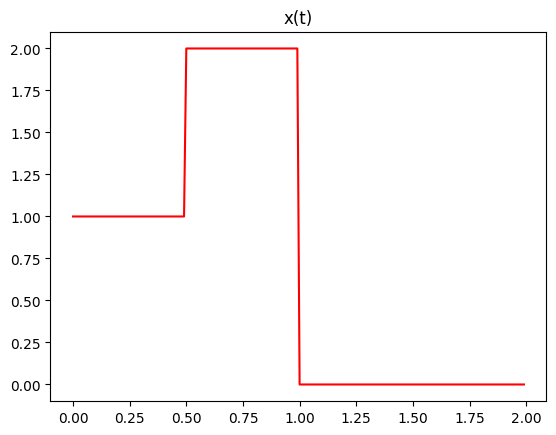

In [11]:
t = np.arange(0,2,0.01)
vectorzed_x = np.vectorize(x)
plt.plot(t,vectorzed_x(t),color="r")
plt.title("x(t)")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

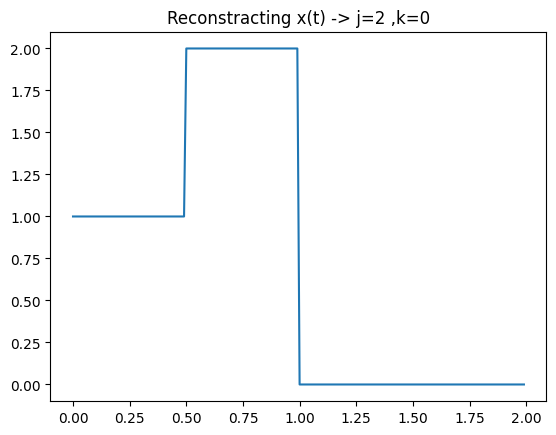

In [12]:
vectorzed_reconstructed_x = reconstract

plt.plot(t,vectorzed_reconstructed_x(t,2,0))
plt.title("Reconstracting x(t) -> j=2 ,k=0")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

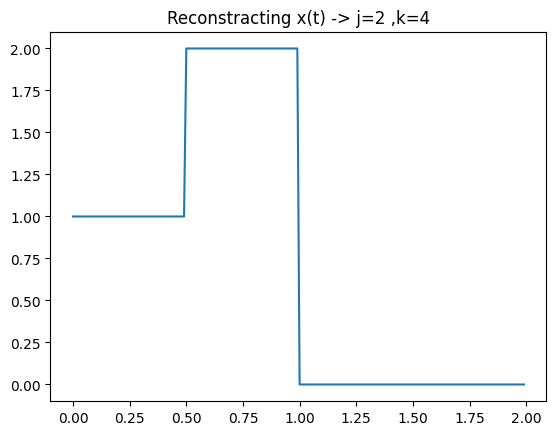

In [13]:
vectorzed_reconstructed_x = reconstract

plt.plot(t,vectorzed_reconstructed_x(t,2,4))
plt.title("Reconstracting x(t) -> j=2 ,k=4")
plt.show

# ${\color{pink}{Threshold- Reconstracting:}}$

In [14]:
def d_j_k_threshold(j,k,threshold,functions=x):
    value = d_j_k(j,k,functions)
    if np.abs(value) >= threshold:
        return value
    return 0

In [15]:
def reconstract_threshold(t,j,k,threshold,func=x):

    sum_k = 0 
    sum_j = 0
    vectorzed_phi_j_k = np.vectorize(phi_j_k)
    vectorzed_psi_j_k = np.vectorize(psi_j_k)
    for i_k in range(k+1):
        sum_k += c_j_k(0,i_k,func)*vectorzed_phi_j_k(t,0,i_k)
    
    for i_j in range(j+1):
        for i_k in range(k+1):
        #i_k = np.floor(2**i_j)
            sum_j += d_j_k_threshold(i_j,i_k,threshold,func)*vectorzed_psi_j_k(t,i_j,i_k)
            
    final_sum_numeric = (sum_k + sum_j)
    return final_sum_numeric

<function matplotlib.pyplot.show(close=None, block=None)>

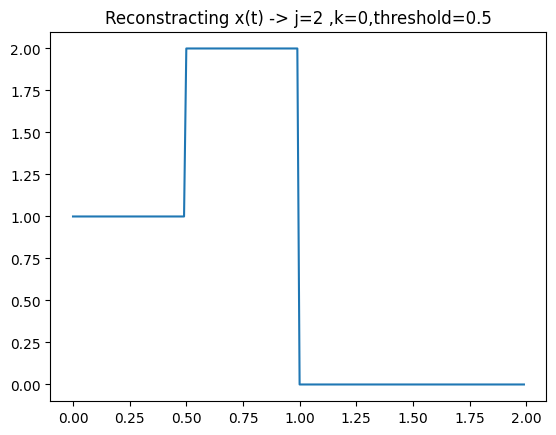

In [16]:
vectorzed_reconstructed_x = reconstract_threshold

plt.plot(t,vectorzed_reconstructed_x(t,21,0,0.5))
plt.title("Reconstracting x(t) -> j=2 ,k=0,threshold=0.5")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

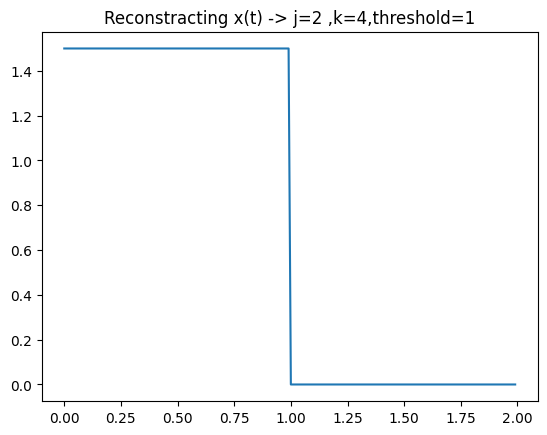

In [17]:
vectorzed_reconstructed_x = reconstract_threshold

plt.plot(t,vectorzed_reconstructed_x(t,2,4,1))
plt.title("Reconstracting x(t) -> j=2 ,k=4,threshold=1")
plt.show

# ${\color{pink}{Checking- With- Sin!:}}$

<function matplotlib.pyplot.show(close=None, block=None)>

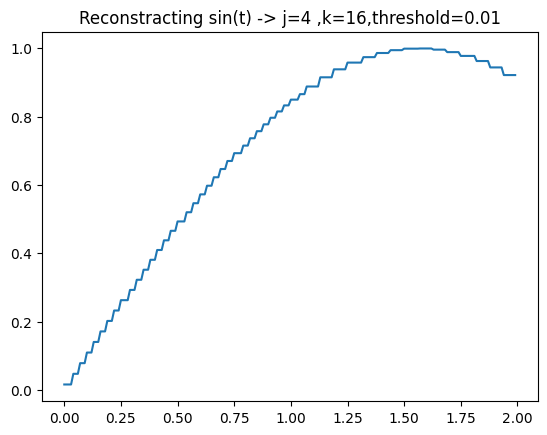

In [18]:
vectorzed_reconstructed_sinu = np.vectorize(reconstract_threshold)

plt.plot(t,vectorzed_reconstructed_sinu(t,4,16,0,np.sin))
plt.title("Reconstracting sin(t) -> j=4 ,k=16,threshold=0.01")
plt.show

----

# ${\color{pink}{Plotting - Psi:}}$

$$
\psi _{1,0} , \psi _{2,1}, \psi _{3,0}
$$

In [19]:
t = np.arange(0,1,0.01)

def psi(t):
    if 0<=t and t<0.5:
        return 1
    if 0.5<=t and t<1:
        return -1
    return 0

In [20]:
def psi_j_k(t,j,k):
    return 2**(j/2) * psi((2**j)*t-k)

vectorzed_psi_j_k = np.vectorize(psi_j_k)   #in order to use with 


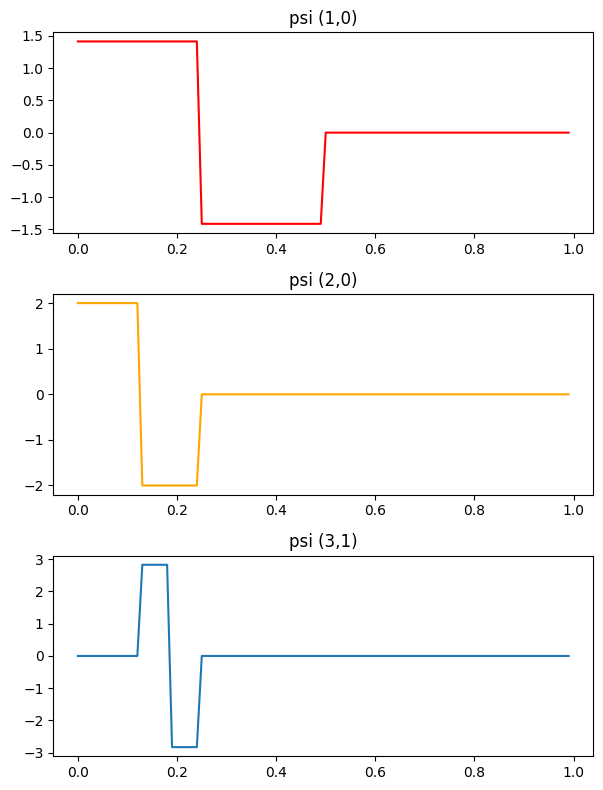

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))  

axes[0].plot(t, vectorzed_psi_j_k(t, 1, 0),color="red")
axes[0].set_title("psi (1,0)")

axes[1].plot(t, vectorzed_psi_j_k(t, 2, 0),color="orange")
axes[1].set_title("psi (2,0)")

axes[2].plot(t, vectorzed_psi_j_k(t, 3, 1))
axes[2].set_title("psi (3,1)")

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

# ${\color{pink}{Fourier -transform}}$

$$
\Psi _{1,0} , \Psi _{2,1}, \Psi _{3,0}
$$

In [22]:
def fft_psis(t,j,k):

    psi_vals = vectorzed_psi_j_k(t, j, k) 

    psi_fft = np.fft.fft(psi_vals)
    freqs = np.fft.fftfreq(len(t))

    #get only freaq>0
    mask = freqs > 0
    freqs_positive = freqs[mask]
    psi_fft_positive = psi_fft[mask]
    return freqs_positive,psi_fft_positive

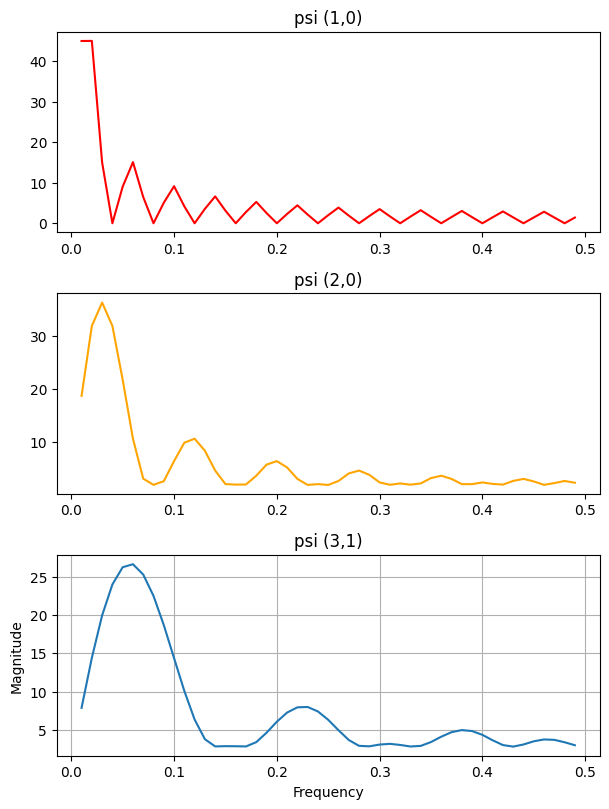

In [23]:
import numpy as np
import matplotlib.pyplot as plt


freqs_positive1,psi_fft_positive1 = fft_psis(t,1,0)
freqs_positive2,psi_fft_positive2 = fft_psis(t,2,1)
freqs_positive3,psi_fft_positive3 = fft_psis(t,3,0)


fig, axes = plt.subplots(3, 1, figsize=(6, 8))  

axes[0].plot(freqs_positive1, np.abs(psi_fft_positive1),color="red")
axes[0].set_title("psi (1,0)")

axes[1].plot(freqs_positive2, np.abs(psi_fft_positive2),color="orange")
axes[1].set_title("psi (2,0)")

axes[2].plot(freqs_positive3, np.abs(psi_fft_positive3))
axes[2].set_title("psi (3,1)")

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid()
plt.show()
